Bragg angle & intensity calculator
Description: The purpose of this code is to...

i) read in atomic form factors 

ii) read in user-inputted atomic positions

iii) Calculate the structure factor

iv) Calculate bragg angles and respective miller indices & intensities

v) Plot and export relevant information

David Beckwitt
August 8/3/2022

# Initialize parameters

In [168]:
%reset

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from IPython.display import clear_output
import matplotlib.image

# rounding function (dfault: n=3 decimals)
rd = lambda x, n=3: np.round(x,n)
π= np.pi

pd.options.display.precision = 2
pd.set_option('display.precision', 2)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [169]:
# X-Ray Wavelength (Cu-K-α)
λ= 1.54178*10**(-10)

# Initialize Geometry of Molecule

Molecule name:$\text{PbI}_2$

Space Group: $\text{Hexagonal } \text{P6}_3\text{mc}$

In [170]:
# unit cell vectors 
av= 4.59*10**(-10)
bv= av 
cv= 6.78*10**(-10)

In [171]:
#unit cell angles 
α=π/2
β=π/2
γ=(3/2)*π

## Atomic Form Factors

Form Factor Eq:
\begin{equation}\label{eq:}
f= \sum_{\ell=1}^4 a_\ell \cdot e^{-b_\ell \big( \frac{q}{4 \pi} \big)^2} + c
\end{equation}


In [172]:
a = [0]*4
b = [0]*4
q, x, θi = sp.symbols('q x θi')

#Atomic Form Factors are all pulled from http://lampx.tugraz.at/~hadley/ss1/crystaldiffraction/atomicformfactors/formfactors.php
FF = pd.read_excel('AtomicFF.xlsx', header= 0)

# Names of atoms
Atom1 = 'Pb2+'
Atom2 = "I1-"

At1 = FF[FF['Element'].eq(Atom1)]
At2 = FF[FF['Element'].eq(Atom2)]

print(At1)
print(At2)
# Atomic Form Factor Class
class AFF:
    def __init__(self, a, b,c):
        self.a = np.array(a)
        self.b = np.array(b)
        self.c = np.array(c)


# Solve equation for referenced atom
def evalF(mol,q):
        x = float(0)
        for i in range(4): 
             x += mol.a[i] * sp.exp(-mol.b[i] * (q/(4*π))**2)
        return x + mol.c
print(At1.iloc[0][2])

    Element     a1    b1     a2    b2     a3    b3    a4     b4      c
179    Pb2+  21.79  1.34  19.57  0.49  19.14  6.77  7.01  23.81  12.47
    Element     a1    b1    a2    b2    a3     b3    a4     b4     c
114     I1-  20.23  4.36  19.0  0.38  7.81  29.53  2.89  84.93  4.07
1.3366


12.4734 + 7.01107*exp(-0.150798850644482*q**2) + 19.1406*exp(-0.0428886237784038*q**2) + 21.7886*exp(-0.00846411837852179*q**2) + 19.5682*exp(-0.00309272147692474*q**2)


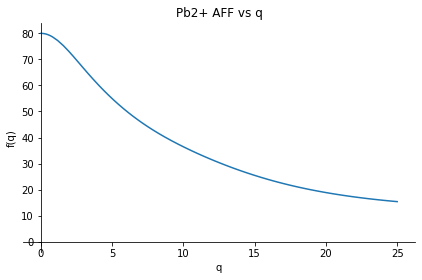

In [173]:
# Lead 2+
a[0] = At1.iloc[0][1]
a[1] = At1.iloc[0][3]
a[2] = At1.iloc[0][5]
a[3] = At1.iloc[0][7]

b[0] = At1.iloc[0][2]
b[1] = At1.iloc[0][4]
b[2] = At1.iloc[0][6]
b[3] = At1.iloc[0][8]


c = At1.iloc[0][9]

Pb= AFF(a,b,c)

Pbsol = evalF(Pb,q)
print(Pbsol)

# Plot with sympy. plot2 is an invisible point at the origin to keep the plot correct.
PbPlot = sp.plotting.plot(Pbsol, (q,0,25),nb_of_points=1000, show=False, title= ("Pb2+ AFF vs q"))
plot2 = sp.plotting.plot(0,(x,0,1/1000), line_color='none', show=False)

PbPlot.append(plot2[0])
PbPlot.show()

4.0714 + 2.8868*exp(-0.537828040951075*q**2) + 7.8069*exp(-0.186974946006581*q**2) + 20.2332*exp(-0.027596724137184*q**2) + 18.997*exp(-0.00241587697247199*q**2)


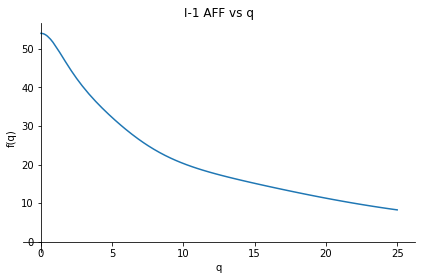

In [174]:
#Iodine -1
a[0] = At2.iloc[0][1]
a[1] = At2.iloc[0][3]
a[2] = At2.iloc[0][5]
a[3] = At2.iloc[0][7]

b[0] = At2.iloc[0][2]
b[1] = At2.iloc[0][4]
b[2] = At2.iloc[0][6]
b[3] = At2.iloc[0][8]


c = At2.iloc[0][9]

I=AFF(a,b,c)

Isol = evalF(I,q)
print(Isol)

IPlot = sp.plotting.plot(Isol, (q,0,25),nb_of_points=1000,show=False, title= ("I-1 AFF vs q"))

IPlot.append(plot2[0])
IPlot.show()

## Reciprocal Vectors

Hexagonal structure has reciprocal vectors of
\begin{equation}
q = \sqrt{\frac{4}{3} \frac{h^2 + h k+ k^2}{\alpha^2} + \frac{\ell^2}{\beta^2}}
\end{equation}



In [175]:
# For hexagonal
def ThreeDPeak(h, k, ℓ):
    d = sp.sqrt(4/3 * (h**2 + h*k + k**2)/av**2+ (ℓ/cv)**2)
    angle = (360/np.pi) * np.arcsin(float(d)*λ/2)   # calculate 2theta angle
    return d, angle

def TwoDPeak(h,k,ℓ):
    
    d = sp.sqrt(4/3 * (h**2 + h*k + k**2)/av**2+ (ℓ/cv)**2)**(-1)
    angle = sp.asin(((1 - ((2*d/c)*c)**2 - ((2*d/c)*c*sp.sin(θi) - 1/2*λ/d)**2/sp.cos(θi)**2)/(1 - 1/4*(λ/d)**2))**(1/2))
    return angle
    
# For Tetragonal 
def tet(h,k,l):
    d = ((h**2+k**2)/av**2 + l**2/cv**2)**(1/2)   # d for tetragonal structure
    angle = (360/np.pi) * np.arcsin(d*λ/2)   # calculate 2theta angle
    return  angle


In [176]:
# Generate Miller Indices
mx=4
miller = [p for p in itertools.product([0,1,2,3], repeat=3)]

In [177]:
# Create all miller indices and calculate where the peaks are at
θ = np.zeros( (mx**3, 5)) # Permutations without repitition to generate all possible bragg indices
dhkl = np.zeros( (mx**3)) # Permutations without repitition to generate all possible bragg indices

for i in range(mx**3):
    θ[i,0] = rd(miller[i][0],1)
    θ[i,1] = rd(miller[i][1],1)
    θ[i,2] = rd(miller[i][2],1)
    dhkl[i], θ[i,3] = ThreeDPeak(θ[i,0],θ[i,1],θ[i,2])
    θ[i,4] = (dhkl[i])

C:\Users\Kenpo\AppData\Local\Temp\ipykernel_43976\232578655.py:4: RuntimeWarning: invalid value encountered in arcsin
  angle = (360/np.pi) * np.arcsin(float(d)*λ/2)   # calculate 2theta angle


# Calculate 3D Powder 

The condition for diffraction in a 3D powder is that  $| \vec{Q}'| ^2$ = $| \vec{G}'| ^2$. A polycrystaline material/powder doesn't have any constraints for the lattice rotations.

In [178]:

θ = θ[θ[:,3].argsort()]    #Sorts the solutions from lowest angle to largest


# Calculate 2D Powder

## Peak 2θ Positions

Unlike a polycrystalline material, 2D-Monocrystalline materials have the restriction that rotation is only allowd in the y-z plane. Therefore, the conditions are that,
$
\begin{align}
Q_{z'} &= G_{z'}  \\
G_{x'}^2+G_{y'}^2 &= G_{\perp}^2
\end{align}
$

For the $(00\ell)$ conditions, $G_\perp=0$ and gives the typical Bragg's Law:
$\begin{align}
2d_{hk\ell} \sin(\theta/2) = \lambda
\end{align}$

## Peak angle from center

In [179]:
# Create all miller indices and calculate where the peaks are at
ϕeq = sp.MutableDenseNDimArray(np.zeros((mx**3, 4), dtype=int)) # Permutations without repitition to generate all possible bragg indices

for i in range(mx**3):
    ϕeq[i,0] = rd(θ[i][0],1)
    ϕeq[i,1] = rd(θ[i][1],1)
    ϕeq[i,2] = rd(θ[i][2],1)
    ϕeq[i,3] = TwoDPeak(θ[i,0],θ[i,1],θ[i,2]) 
print(ϕeq)

[[0.0, 0.0, 0.0, asin((zoo*sin(θi)**2/cos(θi)**2 + zoo)**0.5)], [0.0, 0.0, 1.0, asin(1.00652726823698*(-0.0129278241596401*(1.19260594896808e-8*sin(θi) - 1)**2/cos(θi)**2 + 1)**0.5)], [0.0, 1.0, 0.0, asin(1.01935239735172*(-0.0376095545461305*(4.09943701436003e-9*sin(θi) - 1)**2/cos(θi)**2 + 1)**0.5)], [1.0, 0.0, 0.0, asin(1.01935239735172*(-0.0376095545461305*(4.09943701436003e-9*sin(θi) - 1)**2/cos(θi)**2 + 1)**0.5)], [0.0, 1.0, 1.0, asin(1.02626865362875*(-0.0505373787057706*(3.05077160605473e-9*sin(θi) - 1)**2/cos(θi)**2 + 1)**0.5)], [1.0, 0.0, 1.0, asin(1.02626865362875*(-0.0505373787057706*(3.05077160605473e-9*sin(θi) - 1)**2/cos(θi)**2 + 1)**0.5)], [0.0, 0.0, 2.0, asin(1.02690368310401*(-0.0517112966385604*(2.98151487242019e-9*sin(θi) - 1)**2/cos(θi)**2 + 1)**0.5)], [0.0, 1.0, 2.0, asin(1.04789387894612*(-0.0893208511846909*(1.72611431659112e-9*sin(θi) - 1)**2/cos(θi)**2 + 1)**0.5)], [1.0, 0.0, 2.0, asin(1.04789387894612*(-0.0893208511846909*(1.72611431659112e-9*sin(θi) - 1)**2/

Now we need to make a NxN matrix solving the $\phi$ values for each $\theta$ bragg peak.

In [180]:
init = 10 * (np.pi/180)
final = 10.1 * (np.pi/180)

ϕ = np.zeros((int((final-init)*1000),mx**3), dtype=np.complex_)

for i in range(mx**3):
    for j in range(len(ϕ[:,0])):
        ϕ[j,i] = 90-np.real(ϕeq[i,3].evalf(subs={θi:10*np.pi/180}))* 180/np.pi
    clear_output(wait=True)        
    print(round((i+1)/(mx**3)*1000,1))
    
ϕ = ϕ[:,:].real
ϕ[ ϕ==0 ] = np.nan
θ[:,4] = ϕ[0,:]
df = pd.DataFrame(θ[:,:]) #convert to data fram with pandas
filepath = 'data.xlsx'
df.to_excel(filepath, index=False)      #Export for excel

display(df.style.format(precision=2))

1000.0


,0,1,2,3,4
0,0.00,0.00,0.00,0.00,nan
1,0.00,0.00,1.00,13.06,1.16
2,0.00,1.00,0.00,22.36,2.00
3,1.00,0.00,0.00,22.36,2.00
4,0.00,1.00,1.00,25.98,2.33
5,1.00,0.00,1.00,25.98,2.33
6,0.00,0.00,2.00,26.29,2.36
7,0.00,1.00,2.00,34.78,3.17
8,1.00,0.00,2.00,34.78,3.17
9,1.00,1.00,0.00,39.25,3.61


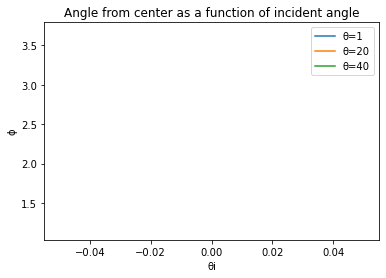

In [181]:
ax = plt.subplot(1,1,1)

p1, = ax.plot(ϕ[:,1], label="θ=1")
p2, = ax.plot(ϕ[:,5], label="θ=20")
p3, = ax.plot(ϕ[:,10], label="θ=40")
plt.title("Angle from center as a function of incident angle")
plt.xlabel("θi")
plt.ylabel("ϕ")

ax.legend()


As a function of initial angle, the derivative is: 

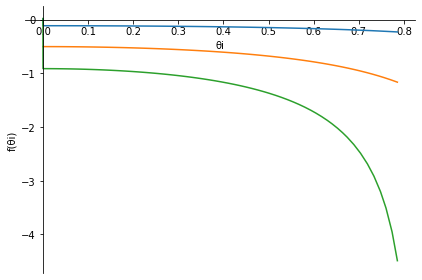

In [182]:
sp.plot(sp.diff(ϕeq[1,3],θi),sp.diff(ϕeq[20,3],θi),sp.diff(ϕeq[40,3],θi), (θi,0,np.pi/4))


## Streak vs. 2theta

In [183]:
Streak = np.zeros((mx**3,2))

for i in range(len(Streak)):
    Streak[i,0] = np.nanmax(ϕ[:,i])-np.nanmin(ϕ[:,i])
    Streak[i,1] = np.nanmax(ϕ[:,i])
    print(Streak)
    
ϕ[ ϕ==0 ] = np.nan


[[nan nan]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
[[       nan        nan]
 [0.         1.15626962]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.     

C:\Users\Kenpo\AppData\Local\Temp\ipykernel_43976\923271654.py:4: RuntimeWarning: All-NaN slice encountered
  Streak[i,0] = np.nanmax(ϕ[:,i])-np.nanmin(ϕ[:,i])
C:\Users\Kenpo\AppData\Local\Temp\ipykernel_43976\923271654.py:5: RuntimeWarning: All-NaN slice encountered
  Streak[i,1] = np.nanmax(ϕ[:,i])


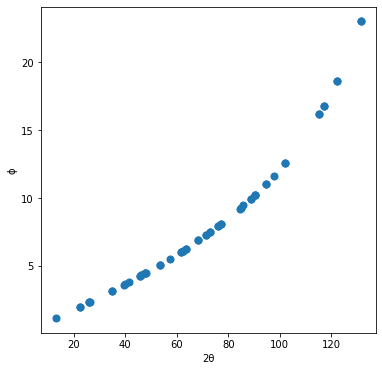

In [184]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)

sc = plt.scatter(θ[:,3],Streak[:,1], s = 50) #c=Streak[:,0])
# plt.set_cmap("bwr") 
# cbar = fig.colorbar(sc, orientation='horizontal')    
# cbar.set_label("Magnitude of Streak Angle over ϕ")
plt.ylabel("ϕ")
plt.xlabel("2θ")
plt.savefig('phivstheta.png')
plt.show()


# Mapping to Sheet

Here, the motivation is to map the bragg peaks of either a 3D or 2D powder onto an NxN sheet similar to real experiments. 

## Sheet Parameters 

In [185]:
Sheet = np.zeros((3000,3000))# Define sheet size

d = 74.5*10**(-3)

λ= 1.54178 *10**(-10) #CuKα ;
tilt= -1.54 * (np.pi/180)    # Angle of Tilt
ρ = 100 * 10**-6      # Pixel Size

#The center of the detector is at pixel,
c = np.array([1653,3000-1568])
# Note its flipped becaues python matrices are different than the CrystalClear software


## Calculate Constructive Pixels

In [186]:
m = d*np.tan(θ[:,3]*np.pi/180)/ρ # Calculate magnitude distance from center

x = (np.absolute(np.cos(ϕ[:,:]))*m+c[1])
y = (np.absolute(np.sin(ϕ[:,:])*m)+c[0])

print(x)

[[            nan  1.50158938e+03  1.55888461e+03  1.55888461e+03
   1.68231246e+03  1.68231246e+03  1.69317612e+03  1.94923460e+03
   1.94923460e+03  1.97651761e+03  1.97021665e+03  1.93982298e+03
   1.76831641e+03  1.76831641e+03  1.73357201e+03  1.73357201e+03
   1.62930059e+03  1.62930059e+03  1.61517001e+03  1.80423603e+03
   1.80423603e+03  2.26533200e+03  2.78061146e+03  2.78061146e+03
   2.82267378e+03  2.82267378e+03  2.91967785e+03  2.91967785e+03
   2.99252396e+03  2.99252396e+03  2.67869536e+03  2.67869536e+03
   2.35636643e+03  2.35636643e+03  1.65451554e+03  1.65451554e+03
   2.26523524e+03  2.26523524e+03  8.85884492e+03  9.54575395e+03
   9.54575395e+03  1.18201226e+04  3.08374259e+04  3.08374259e+04
  -1.43072354e+05 -1.43072354e+05 -8.49113791e+04  1.13507565e+03
   1.13507565e+03 -1.91725553e+03 -2.02345022e+03 -2.02345022e+03
   5.04334146e+01  5.04334146e+01  6.90210551e+02  6.90210551e+02
   2.79180409e+02  2.79180409e+02  9.90138447e+02  9.90138447e+02
          

## Map Pixel Space 

In [187]:
Sheet = np.zeros((3000,3000))# Define sheet size
Sheet[c[0]-20:c[0]+20,c[1]-20:c[1]+20] = 1  

for i in range(mx**3):
    for j in range(len(ϕ[:,0])):
        if (np.isnan(x[j,i])!=True and np.isnan(y[j,i]) != True):
            if (int(x[j,i])<2998 and int(x[j,i])>2) and (int(y[j,i])<2998 and int(y[j,i])>2):
                Sheet[int(y[j,i]), int(x[j,i])] = 1
                Sheet[int(y[j,i])-10:int(y[j,i])+10, int(x[j,i])-10:int(x[j,i])+10] = 1 
                
                diff = 2*(int(y[j,i])-c[0])
                Sheet[int(y[j,i])-diff, int(x[j,i])] = 1
                Sheet[int(y[j,i])-diff-10:int(y[j,i])+10-diff, int(x[j,i])-10:int(x[j,i])+10] = 1  


    if i> mx**3:
        break
    #clear_output(wait=True)        
    #print(round((i+1)/(mx**3)*100,1))

## Plot Image

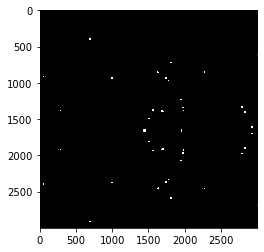

In [188]:
plt.imshow(Sheet,cmap='gray',interpolation='none')

matplotlib.image.imsave('name.png', Sheet, cmap='gray')


# Sheet to Phi

This section works to convert the pixel positions of spots to theta & phi

In [189]:

π= np.pi

λ= 1.54178 *10**(-10) #CuKα ;
ℓ= 74.5 *10**-3       # Distance to center of detector;
T= -1.54 * (π/180)    # Angle of Tilt
ρ = 100 * 10**-6      # Pixel Size
c = np.array([1568,1653]);

def findt(x,peaks):
    d = []
    D = []
    θ = []
    ϕ = []
    
    for z in range(peaks):

        # Find magnitude length to peak position 
        d.append( np.sqrt(((x[z,0]-c[0])*ρ)**2 + ((x[z,1]-c[1])*ρ)**2))           
        print('Peak ', z+1, ':')            
        print('Distance from center to point on screen:', d[z])  

        # Calculate the actual distance to the screen using the angle of tilt 
        D.append(np.sqrt(d[z]**2 + ℓ**2 - 2 * d[z] * ℓ * np.cos(π/2 + T) ))                        
        print('Distance to screen from beam', D[z])

        # Solve for the 2-theta of the peak
        θ.append( np.arccos( (ℓ**2 - d[z]**2)/(2*D[z]*ℓ) + D[z]/(2*ℓ)))
        print('Converted to degrees: ' , θ[z]*180/π , "degrees" )


    
    return d, D, θ, ϕ

def findp(x):
    d = []
    D = []
    θ = []
    ϕ = []
    ϕd =[]
    peaks = int(len(x))
    ϕΔ = []
    ϕθ = []
    
    
    for z in range(peaks):

        # Solve for the phi of the spot
        ϕ.append( np.absolute( np.arctan( (x[z,1]-c[1])/(x[z,0]-c[0]))))
                 
        # Find magnitude length to peak position 
        d.append( np.sqrt(((x[z,0]-c[0])*ρ)**2 + ((x[z,1]-c[1])*ρ)**2))           

        # Calculate the actual distance to the screen using the angle of tilt 
        D.append(np.sqrt(d[z]**2 + ℓ**2 - 2 * d[z] * ℓ * np.cos(π/2 + T) ))  
        
        # Solve for the 2-theta of the peak
        θ.append( np.arccos( (ℓ**2 - d[z]**2)/(2*D[z]*ℓ) + D[z]/(2*ℓ)))
       
    for i in range(int(len(ϕ)/2)):
        ϕΔ.append((ϕ[2*i + 1]-ϕ[i*(i+1)])*180/np.pi)
        ϕθ.append((θ[2*i + 1])*180/np.pi)
        ϕd.append(ϕ[i*(i+1)]*180/np.pi)
        print('At', rd(θ[i*(i+1)]*180/np.pi), '° the Phi smear is: ' , rd(ϕΔ[i] ), '°')
        print('---')
    
    return ϕd, ϕΔ, ϕθ

In [190]:
p = np.array([
    [862,1973], [945,2083], [934,1988],[994,2067]])

At 46.937 ° the Phi smear is:  10.231 °
---
At 44.646 ° the Phi smear is:  7.95 °
---


Text(0.5, 1.0, 'Smear as a function of 2θ')

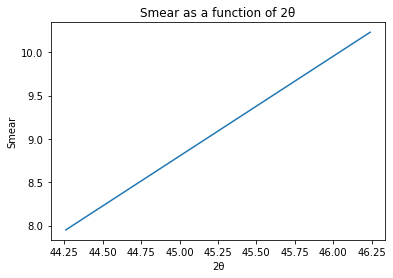

In [191]:
Pbd = []
PbD = []
Pbθ = []

Pbϕ = []
PbϕΔ = []
Pbϕθ = []

Pbϕ, PbϕΔ, Pbϕθ = findp(p)

   
plt.plot(Pbϕθ[:],PbϕΔ[:])
plt.xlabel("2θ")
plt.ylabel("Smear")
plt.title("Smear as a function of 2θ")

Text(0.5, 1.0, 'ϕ as a function of 2θ')

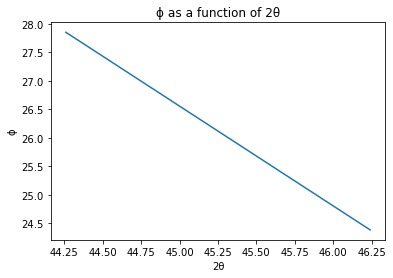

In [192]:
plt.plot(Pbϕθ[:],Pbϕ[:])
plt.xlabel("2θ")
plt.ylabel("ϕ")
plt.title("ϕ as a function of 2θ")

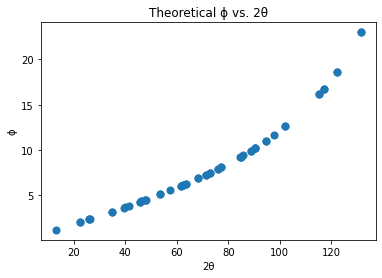

In [194]:
sc = plt.scatter(θ[:,3],Streak[:,1], s = 50) #c=Streak[:,0])
# plt.set_cmap("bwr") 
# cbar = fig.colorbar(sc, orientation='horizontal')    
# cbar.set_label("Magnitude of Streak Angle over ϕ")
plt.ylabel("ϕ")
plt.xlabel("2θ")
plt.title("Theoretical ϕ vs. 2θ")
plt.savefig('phivstheta.png')
plt.show()